<h1><font styke = bold italic>EDA on Car features and MSRP

<b>Context</b>

Cars dataset with features including make, model, year, engine, and other properties of the car used to predict its price.

<b>Content</b>
Scraped from Edmunds and Twitter.

<b>Acknowledgements</b>
Edmunds and Twitter for providing info
Sam Keene
Inspiration

Effects of features on the price
How does the brand affect the price?
What cars can be consider overpriced?
Price VS. popularity?

Importing Libraries

In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)


Displaying Data

In [178]:
df =pd.read_csv("J:\Datasets\cardataset\data.csv")

In [179]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


Checking the data type

In [180]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

><font size = 15> **Data Wrangling**

Dropping irrelevant columns

In [181]:
df = df.drop(['Engine Fuel Type','Market Category','Vehicle Style', 'Popularity', 'Number of Doors',
         'Vehicle Size'], axis = 1)

In [182]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


Renaming the Columns

In [183]:
df = df.rename(columns={'Engine HP':'HP','Engine Cylinders': 'Cylinders',
                        'Transmission Type': 'Transmission','Driven_Wheels': 'Drive Mode',
                        'highway MPG': 'MPG-H', 'MSRP': 'Price', 'city mpg': 'MPG-C'})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


Dropping Duplicate rows

In [184]:
df.shape #total number of rows and columns

(11914, 10)

In [185]:
#rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (989, 10)


removing duplicate rows

In [186]:
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [187]:
# Dropping the duplicates
df = df.drop_duplicates()
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [188]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

Dropping the missing or null values

In [189]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


This is the reason in the above step while counting both Cylinders and Horsepower (HP) had 10856 and 10895 over 10925 rows.

In [190]:
df = df.dropna()
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP)).

In [191]:
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


Detecting Outliers

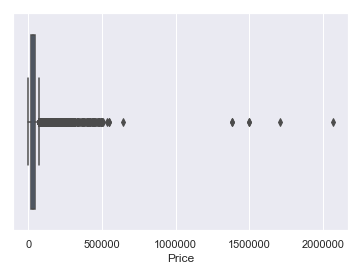

In [192]:
sns.boxplot(x=df['Price'])

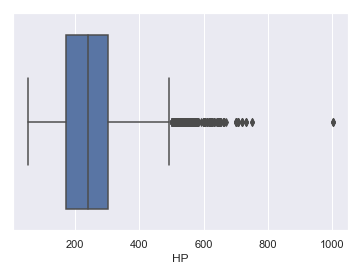

In [193]:
sns.boxplot(x=df['HP'])

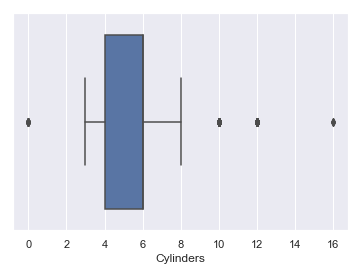

In [194]:
sns.boxplot(x=df['Cylinders'])

In [198]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [201]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(9191, 10)

As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing.

>Plot different features against one another (scatter), against frequency (histogram)

**Histogram** 

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

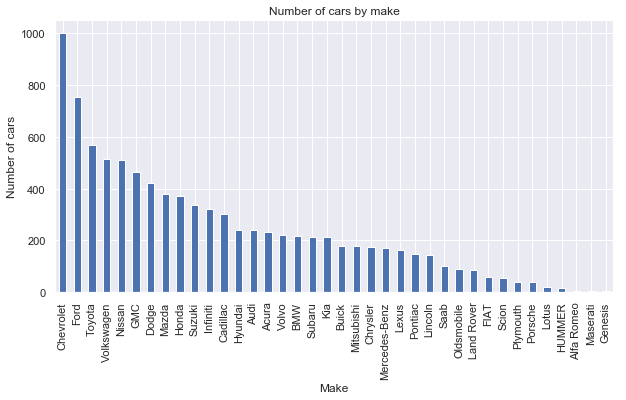

In [205]:
# Plotting a histogram
df.Make.value_counts().nlargest(40).plot(kind= 'bar', figsize = (10,5))
plt.title('Number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('Make');

**Heat Maps**

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


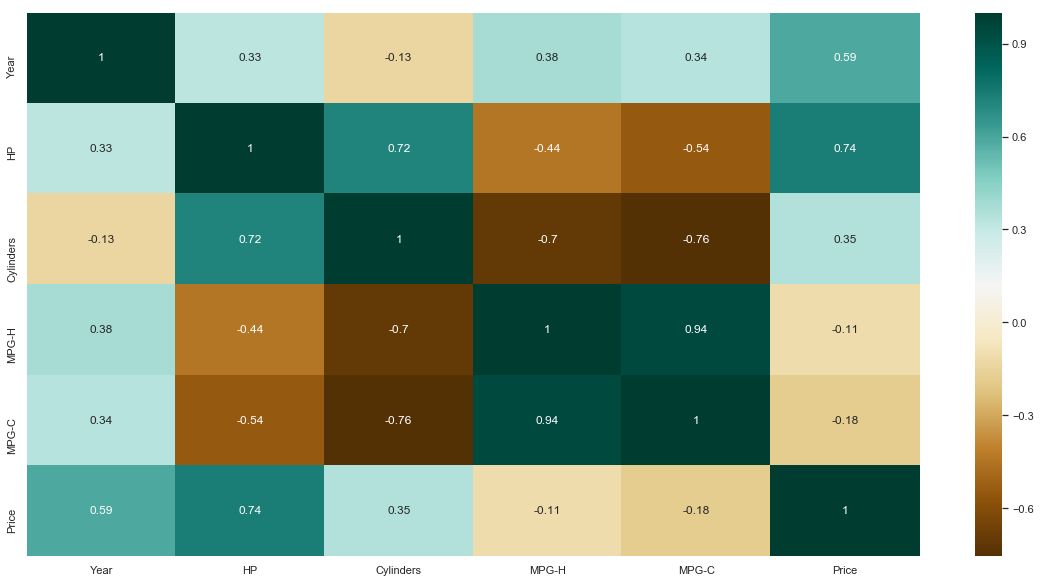

In [208]:
# Finding the relations between the variables
plt.figure(figsize = (20,10))
c = df.corr()
sns.heatmap(c,cmap = 'BrBG', annot = True)
c

**Scatter Plot**

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

<function matplotlib.pyplot.show(*args, **kw)>

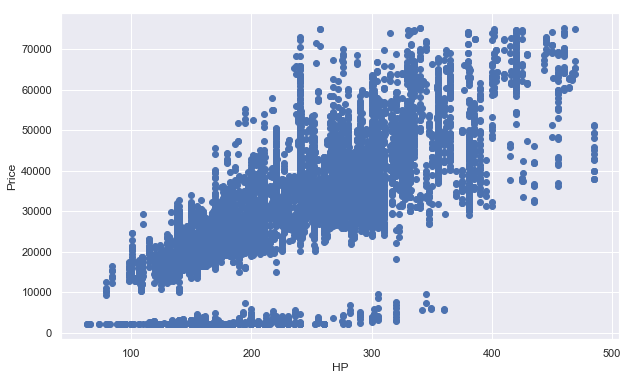

In [210]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show